## Cutting Stock / One-dimensional Bin Packing Problem

The One-dimensional Cutting Stock Problem (also often referred to as One-dimensional Bin Packing Problem) is an NP-hard problem first studied by Kantorovich in 1939 [Kan60]. The problem consists of deciding how to cut a set of pieces out of a set of stock materials (paper rolls, metals, etc.) in a way that minimizes the number of stock materials used.

[Kan60] proposed an integer programming formulation for the problem, given below:

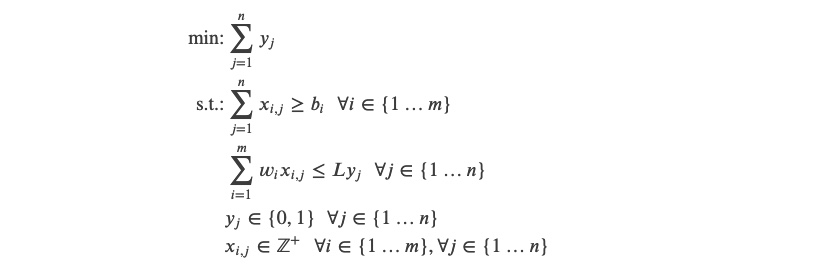

This formulation can be improved by including symmetry reducing constraints, such as:

𝑦𝑗−1≥𝑦𝑗∀𝑗∈{2…𝑛}
The following Python-MIP code creates the formulation proposed by [Kan60], optimizes it and prints the optimal solution found.

In [1]:
from mip import Model, xsum, BINARY, INTEGER

n = 10  # maximum number of bars
L = 250  # bar length
m = 4  # number of requests
w = [187, 119, 74, 90]  # size of each item
b = [1, 2, 2, 1]  # demand for each item

# creating the model
model = Model()
x = {(i, j): model.add_var(obj=0, var_type=INTEGER, name="x[%d,%d]" % (i, j))
     for i in range(m) for j in range(n)}
y = {j: model.add_var(obj=1, var_type=BINARY, name="y[%d]" % j)
     for j in range(n)}

# constraints
for i in range(m):
    model.add_constr(xsum(x[i, j] for j in range(n)) >= b[i])
for j in range(n):
    model.add_constr(xsum(w[i] * x[i, j] for i in range(m)) <= L * y[j])

# additional constraints to reduce symmetry
for j in range(1, n):
    model.add_constr(y[j - 1] >= y[j])

# optimizing the model
model.optimize()

# printing the solution
print('')
print('Objective value: {model.objective_value:.3}'.format(**locals()))
print('Solution: ', end='')
for v in model.vars:
    if v.x > 1e-5:
        print('{v.name} = {v.x}'.format(**locals()))
        print('          ', end='')

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 18 (-5) rows, 45 (-5) columns and 110 (2) elements
Clp1000I sum of infeasibilities 2.07694e-10 - average 1.15385e-11, 0 fixed columns
Coin0506I Presolve 18 (0) rows, 45 (0) columns and 110 (0) elements
Clp0029I End of values pass after 45 iterations
Clp0000I Optimal - objective value 2.652
Clp0000I Optimal - objective value 2.652
Coin0511I After Postsolve, objective 2.652, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 2.652
Clp0000I Optimal - objective value 2.652
Clp0000I Optimal - objective value 2.652
Coin0511I After Postsolve, objective 2.652, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2.652 - 0 iterations time 0.012, Presolve 0.00, Idiot 0.01

Starting MIP optimization

Objective value: 3.0
Solution: x[0,0] = 1.0
          x[1,2] = 2.0
          x[